# ARCDAP-3 ESMValTool Worksheet 

---
## Module 1+ (Solutions)

---

In [ ]:
# created by Gerald on 20 Jan 2020

# copy & paste the ESM_Worksheets folder into the ~/ESMValtool/ directory and open it there.

Welcome to Module 1+ of the ESMValTool Worksheet designed for the hands-on sessions during the ARCDAP-3 workshop. Module 1+ will cover CMORizing an observation/reanalysis dataset into a CF/CMOR-compliant file that can be read by ESMValTool. Please only start this worksheet after you've completed Module 1. 

Enter your details in the cell below:

In [ ]:
# Name: 
# Organisation: 
# GCMs used: 

In [2]:
#imports 

import numpy as np
import scipy as sp
import xarray as xr

from IPython.display import Image, display

import fnmatch # find match

import glob
from pprint import pprint
from pathlib import Path

## Task 1+: CMORizing a Raw Observation file  
---

**Data and Scripts needed:** <br>
Raw Observation output: <br>
- 1x HadISST (*HadISST_sst.nc*) <br>
- Variables: ts/SST <br>
- Frequency: Monthly mean <br>

Script: */home/arcdap/miniconda3/envs/esmvaltool/lib/python3.7/site-packages/esmvaltool/cmorizers/obs/cmorize_obs_hadisst.ncl*

---

ESMValTool accepts input data from various models as well as observations and reanalysis data, provided that they adhere to the Climate and Forecast (CF)/ Climate Model Output Rewriter (CMOR) format. Observational and reanalysis products in the standard CF/CMOR format used in CMIP and required by the ESMValTool are available via the [obs4mips](https://esgf-node.llnl.gov/projects/obs4mips/) and [ana4mips](https://esgf.nccs.nasa.gov/projects/ana4mips/) proejcts, respectively. 

To process datasets that are not available in these archives, they can first be obtained by the user from the respective sources and thenreformatted to the CF/CMOR standard using the cmorizers included in the ESMValTool. The cmorizers are dataset-specific scripts that can be run once to generate a local pool of observational datasets for usage with the ESMValTool. For more info see [Acquiring Input Data](https://esmvaltool.readthedocs.io/en/latest/getting_started/inputdata.html)

The ERA-Interim files that you downloaded have already been CMORized, hence they were stored in the *~/Obs* folder in Module 1, Task 0. Raw Observations (non-CMORized) like the *HadISST_sst.nc* file you downloaded are typically placed in a different folder (e.g. *~/RawObs*) to avoid confusion. This task will go through the process of CMORizing a raw observation file into one that can be read by ESMValTool. 

### T1+.1. Open and inspect the HadISST CMORizing script 

As mentioned above, CMORizers are dataset-specific scripts which typically provide information on what raw observation data files to download and how to name them, etc. It is important to understand what each script needs from the user (you) as this may differ between different datasets. 

In [ ]:
!geany /home/arcdap/miniconda3/envs/esmvaltool/lib/python3.7/site-packages/esmvaltool/cmorizers/obs/cmorize_obs_hadisst.ncl

1. You should see the ```Downloading and processing instructions``` on line 14-15. For this exercise you've already been provided with the unzipped .nc file and stored it in the *~/RawObs/Tier2/HadISST* directory which you did in Module 1. No renaming of the file names is needed.

2. Scroll down and you'll see that there are options to declare the period of data and selected variables you wish to CMORIze. You can see in line 42 that the ```standard name``` refers to the variable names in the CF/CMOR convention used by CMIP models. ```Name in raw data``` are then simply what the variables are natively called by the raw dataset itself. 

### T1+.2. Edit the HadISST CMORizer script

1. For this particular script, the default lines 43, 46, 49, 52 are such that the script will search for HadISST data files of the ```sst``` and ```ice``` variables and CMORize them. Since we do not have the *HadISST_ice.nc* dataset for this exercise, we have to edit the code such that it only searches for the *HadISST_sst.nc* file. To do so, remove ```"sic"``` from ```VAR``` in line 43 and likewise for its corresponding arguments in lines 46, 49 and 52. Save your recipe file when done.

*Alternatively you can comment out these lines in NCL (NCAR Command Language) using a semicolon ```;```.*

<img src='Images/HadISST_cmor.jpg'>

### T1+.3. CMORize the HadISST data

1. Run the CMORizer script for HadISST in the cell below: 

In [ ]:
!  cmorize_obs -c config-user-example.yml -o HadISST

*Note how you only have to specify the name of the raw observation/reanalysis dataset in the second (-o) argument for the cmorize_obs programme.*

2. Navigate again to the directory containing the CMORizer output.

In [2]:
# Insert output directory
! ls esmvaltool_output/

cmorize_obs_20200120_084210
recipe_cvdp_20191213_172749
recipe_cvdp_20191213_173441
recipe_cvdp_20191214_122333
recipe_cvdp_20200116_075447
recipe_python_20200117_070100
recipe_validation_CMIP6_20191213_221918
recipe_validation_CMIP6_20191214_022739
recipe_validation_CMIP6_20191214_023144
recipe_validation_CMIP6_20191215_230454
recipe_validation_CMIP6_20191215_230902
recipe_validation_CMIP6_20191216_044746_INDOPAC
recipe_validation_CMIP6_20191216_071113
recipe_validation_CMIP6_20191216_071431
recipe_validation_CMIP6_20191216_073610
recipe_validation_CMIP6_20191216_074228
recipe_validation_CMIP6_20191216_092147
recipe_validation_CMIP6_20191216_095212
recipe_validation_CMIP6_20191216_101648
recipe_validation_CMIP6_20200116_031243
recipe_validation_CMIP6_20200120_053308
recipe_validation_CMIP6_20200120_060603


4. The output for your CMORizer script will be stored in a sub-directory structured as *cmorize_obs _ [YYYYMMDD] _ [HHMMSS]*. Use the code below to inspect the output .nc files that have been CMORized. 

In [4]:
home = str(Path.home())  #Your home directory

# Insert the sub-folder containing the cmorizer output into the ''
# e.g. dirname1='cmorize_obs_20200117_070100'
dirname1='cmorize_obs_20200120_101538';  
# Full path of the folder containing the plots produced by the recipe 
dirname=home+'/ESMValTool/esmvaltool_output/'+ dirname1 +'/Tier2/HadISST/';

# List of .png image files in the dirname directory
listing = glob.glob(dirname+'*.nc')

pprint(listing)

['/home/arcdap/ESMValTool/esmvaltool_output/cmorize_obs_20200120_101538/Tier2/HadISST/OBS_HadISST_reanaly_1_Amon_ts_187001-201712.nc',
 '/home/arcdap/ESMValTool/esmvaltool_output/cmorize_obs_20200120_101538/Tier2/HadISST/OBS_HadISST_reanaly_1_Omon_tos_187001-201712.nc']


You'll see that the output files follow the naming convention ```OBS_[dataset]_[type]_[version]_[mip]_[short_name]_YYYYMM_YYYYMM.nc```, where type may be sat (satellite data), reanaly (reanalysis data), ground (ground observations), clim (derived climatologies), campaign (aircraft campaign). The file names may already be familiar from the CMORized ERA-Interim files that you downloaded (which have the ```OBS6``` tag instead). 

### T1+.4. Inspect the CMORized HadISST.nc files

1. Use the xarray library to open and inspect the 'ts' dataset. 

In [5]:
# Insert in the quotations the file path of the CMORized .nc file 
xr.open_dataset("/home/arcdap/ESMValTool/esmvaltool_output/cmorize_obs_20200120_101538/Tier2/HadISST/OBS_HadISST_reanaly_1_Amon_ts_187001-201712.nc")

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, time: 1776)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    title:        HadISST data reformatted for the ESMValTool v2.0
    tier:         2
    source:       http://www.metoffice.gov.uk/hadobs/hadisst/data/download.html
    reference:    Rayner et al., J. Geophys. Res., doi:10.1029/2002JD002670, ...
    user:         arcdap
    host:         antix1
    history:      Created on Mon Jan 20 18:15:51 +08 2020
    conventions:  CF/CMOR

2. Compare this against the raw dataset. Comment on some differences you observe between the raw and CMORized data files. 

In [17]:
# Insert in the quotations the file path of the raw .nc file 
xr.open_dataset("/home/arcdap/RawObs/Tier2/HadISST/HadISST_sst.nc")

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1798)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-10-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    9/12/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

**Comments:**

### T1+.5. Plot the global mean SST from 1979 to 2014 from the HadISST dataset

1. You'll use the same *recipe_python.yml* that you used in Module 1. However, the first thing you need to do is to move your CMORized HadISST .nc files to the */Obs* directory. Remember that was where you set the path for OBS files in the *config-user-example.yml* file, and that your CMORized output is currently in the *esmvaltool_output* directory. 

In [20]:
# Use this command to move the entire 'Tier2' folder in the cmorizer 
# output directory to the ~/Obs directory 
# Insert your output directory in between esmvaltool_output/  and  /Tier2
! mv esmvaltool_output/cmorize_obs_20200120_101538/Tier2/HadISST /home/arcdap/Obs/Tier2

2. Check that the files have been successfully moved and are in the right directory. 

In [21]:
! ls ~/Obs/Tier2/HadISST

OBS_HadISST_reanaly_1_Amon_ts_187001-201712.nc
OBS_HadISST_reanaly_1_Omon_tos_187001-201712.nc


Now modify the *recipe_python.yml* file from Module 1 to plot the mean ts from 1979 to 2014. 

3. First thing to do is to edit the ```datasets``` section to include only the HadISST data. Observation/Reanalysis datasets are specified slightly different than Models here due to the different "keys" used in the naming convention. For the HadISST data, the entry under ```datasets```  would be: 


```- {dataset: HadISST,  project: OBS, mip: Amon, type: reanaly,  version: 1,  start_year: 1979,  end_year: 2014,  tier: 2}```

4. Next thing to modify is the variables, replace the lines 

```ta:
    preprocessor: preprocessor1
pr:```

with simply

``` ts:```

5. Run the recipe in the cell below! 

In [ ]:
# Type in the esmvaltool recipe to run after the config-user-example
# file.  
! esmvaltool -c config-user-example.yml 

6. Once successful, navigate again to the relevant output directory and plot the mean sea surface temperature (ts) from 1979 to 2014 for the HadISST datasset. 

In [27]:
! ls esmvaltool_output/ 

cmorize_obs_20200120_101538
recipe_cvdp_20191213_172749
recipe_cvdp_20191213_173441
recipe_cvdp_20191214_122333
recipe_cvdp_20200116_075447
recipe_python_20200117_070100
recipe_python_20200120_104618
recipe_validation_CMIP6_20191213_221918
recipe_validation_CMIP6_20191214_022739
recipe_validation_CMIP6_20191214_023144
recipe_validation_CMIP6_20191215_230454
recipe_validation_CMIP6_20191215_230902
recipe_validation_CMIP6_20191216_044746_INDOPAC
recipe_validation_CMIP6_20191216_071113
recipe_validation_CMIP6_20191216_071431
recipe_validation_CMIP6_20191216_073610
recipe_validation_CMIP6_20191216_074228
recipe_validation_CMIP6_20191216_092147
recipe_validation_CMIP6_20191216_095212
recipe_validation_CMIP6_20191216_101648
recipe_validation_CMIP6_20200116_031243
recipe_validation_CMIP6_20200120_053308
recipe_validation_CMIP6_20200120_060603


In [36]:
# Insert the sub-folder containing the recipe output into the ''
# e.g. dirname2='recipe_python_20200117_070100'
dirname2='recipe_python_20200120_104618';  
# Full path of the folder containing the plots produced by the recipe 
dirname3=home+'/ESMValTool/esmvaltool_output/'+ dirname2 +'/plots/diagnostic1/script1/';

# List of .png image files in the dirname directory
listing2 = glob.glob(dirname3+'*.png')

pprint(listing2)

['/home/arcdap/ESMValTool/esmvaltool_output/recipe_python_20200120_104618/plots/diagnostic1/script1/OBS_HadISST_reanaly_1_Amon_ts_1979-2014_mean.png']


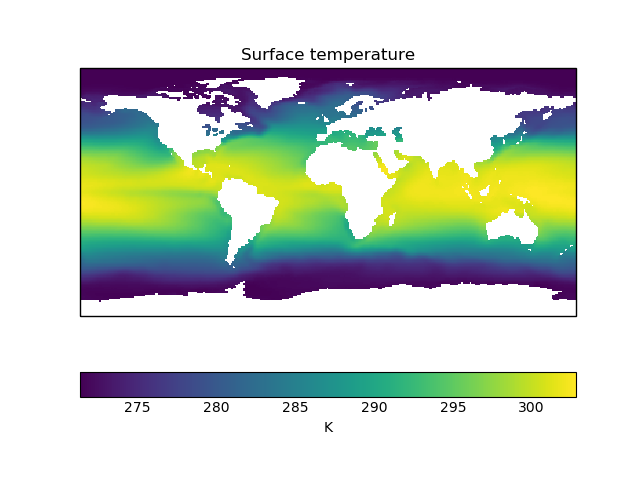

In [32]:
# Display the plot .png file 
display(Image(listing2[0]))

---

In [ ]:
# end of file, Gerald, last edited 21/1/2020.